In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import pickle
import random

import cv2
from skimage.transform import rotate, warp, ProjectiveTransform
from skimage import color

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
np.random.seed(0)

In [11]:
ls german-traffic-signs

signnames.csv  test.p  train.p  valid.p


In [12]:
def get_pickle_files_names(path=''):
  return [filename for filename in glob.glob(path+'*.p')]


def load_pickle_file(path):
  return pd.read_pickle(path)  
  

def load_csv_file(path):
  return pd.read_csv(path)

In [13]:
pickle_files = get_pickle_files_names('german-traffic-signs/')
pickle_files

['german-traffic-signs/test.p',
 'german-traffic-signs/train.p',
 'german-traffic-signs/valid.p']

In [14]:
train_data = load_pickle_file(pickle_files[1])
test_data = load_pickle_file(pickle_files[0])
validation_data = load_pickle_file(pickle_files[2])

In [15]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [16]:
X_train_data, y_train_data = train_data['features'], train_data['labels']
X_test_data, y_test_data = test_data['features'], test_data['labels']
X_val_data, y_val_data = validation_data['features'], validation_data['labels']

In [17]:
print(X_train_data.shape, y_train_data.shape)
print(X_test_data.shape, y_test_data.shape)
print(X_val_data.shape, y_val_data.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


In [18]:
assert X_train_data.shape[0] == y_train_data.shape[0], 'Number of images and labels is not equal'

In [19]:
sign_names = load_csv_file('german-traffic-signs/signnames.csv')
sign_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [20]:
num_of_samples = []
 
cols = 5
num_classes = len(np.unique(y_train_data))
 
# fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
# fig.tight_layout()

for i in range(cols):
    for j, row in sign_names.iterrows():
        x_selected = X_train_data[y_train_data == j]
        # axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        # axs[j][i].axis("off")
        if i == 2:
            # axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

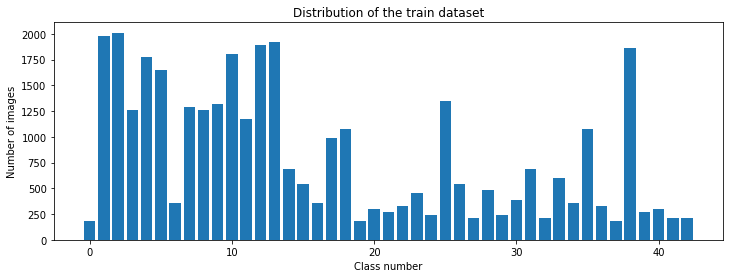

In [21]:
plt.figure(figsize=(12, 4))
plt.bar(range(num_classes), num_of_samples)
plt.title('Distribution of the train dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

### The distribution is not equal thus we need to create some new samples

In [22]:
print(num_of_samples)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


In [23]:
max_samples = 3000

for num_samples in num_of_samples:
  print('Samples to create:', max_samples - num_samples)
  # for i in range(max_samples - num_samples):
    # create sample

Samples to create: 2820
Samples to create: 1020
Samples to create: 990
Samples to create: 1740
Samples to create: 1230
Samples to create: 1350
Samples to create: 2640
Samples to create: 1710
Samples to create: 1740
Samples to create: 1680
Samples to create: 1200
Samples to create: 1830
Samples to create: 1110
Samples to create: 1080
Samples to create: 2310
Samples to create: 2460
Samples to create: 2640
Samples to create: 2010
Samples to create: 1920
Samples to create: 2820
Samples to create: 2700
Samples to create: 2730
Samples to create: 2670
Samples to create: 2550
Samples to create: 2760
Samples to create: 1650
Samples to create: 2460
Samples to create: 2790
Samples to create: 2520
Samples to create: 2760
Samples to create: 2610
Samples to create: 2310
Samples to create: 2790
Samples to create: 2401
Samples to create: 2640
Samples to create: 1920
Samples to create: 2670
Samples to create: 2820
Samples to create: 1140
Samples to create: 2730
Samples to create: 2700
Samples to create

# Data augmentation

- ### Rotating

In [24]:
def rotate_image(image, max_angle=15):
  return rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')

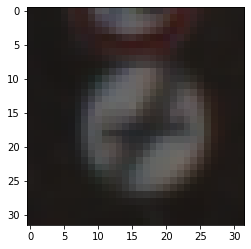

In [25]:
plt.imshow(rotate_image(X_train_data[0]))

- ### Translation (moving image)

In [26]:
def translate_image(image, max_trans=10, height=32, width=32):
  translate_x = max_trans*np.random.uniform() - max_trans/2
  translate_y = max_trans*np.random.uniform() - max_trans/2
  translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
  translation = cv2.warpAffine(image, translation_mat, (height, width))
  return translation

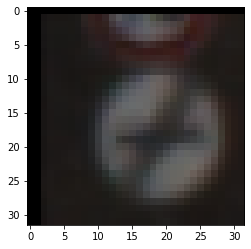

In [27]:
plt.imshow(translate_image(X_train_data[0]))

- ### Projection transform (stretching)

In [28]:
def projection_transform(image, max_warp=0.6, height=32, width=32):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)
    
    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin
        
    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image

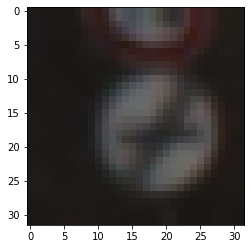

In [29]:
plt.imshow(projection_transform(X_train_data[0]))

## Transformation in a pipeline

In [30]:
def transform_image_pipeline(image, max_angle=15, max_trans=5, max_warp=0.8):
  height, width, channels = image.shape

  # Rotating image
  rotated_image = rotate_image(image, max_angle)

  # Translating image
  translated_image = translate_image(rotated_image, max_trans, height, width)

  # Project image
  projected_image = projection_transform(translated_image, max_warp, height, width)

  return projected_image


def data_augment(image):
  rows= image.shape[0]
  cols = image.shape[1]
  
  # Rotating
  M_rot = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
  
  # Translating
  M_trans = np.float32([[1,0,3],[0,1,6]])

  img = cv2.warpAffine(image,M_rot,(cols,rows))
  img = cv2.warpAffine(img,M_trans,(cols,rows))
  
  # Bilateral filtering
  img = cv2.bilateralFilter(img, 9, 75, 75)

  return img

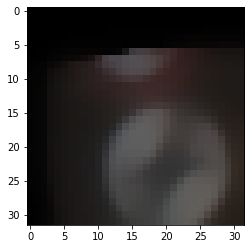

In [31]:
plt.imshow(data_augment(X_train_data[0]))

## Creating new samples

In [32]:
def create_new_samples(X_train_data, y_train, n_classes):
  X_train_aug = X_train_data.copy()
  y_train_aug = y_train.copy()

  X_aug = []
  Y_aug = []

  for i in range(0, n_classes):
    class_records = np.where(y_train==i)[0].size
    max_records = 3000  # max(num_samples)
    if class_records != max_records:
        ovr_sample = max_records - class_records
        samples = X_train_data[np.where(y_train==i)[0]]
        X_aug_temp = []
        Y_aug_temp = [i] * ovr_sample
        print('Class:', i)
        
        for x in range(ovr_sample):
            img = samples[x % class_records]
            trans_img = data_augment(img)
            X_aug_temp.append(trans_img)
            
        X_train_aug = np.concatenate((X_train_aug, X_aug_temp), axis=0)
        y_train_aug = np.concatenate((y_train_aug, Y_aug_temp)) 
        
        Y_aug = Y_aug + Y_aug_temp
        X_aug = X_aug + X_aug_temp
  return X_train_aug, y_train_aug

In [33]:
# # RUN IF NECESSARY

# X_train_aug, y_train_aug = create_new_samples(X_train_data, y_train_data, num_classes)

# X_test_aug, y_test_aug = create_new_samples(X_test_data, y_test_data, num_classes)
# X_val_aug, y_val_aug = create_new_samples(X_val_data, y_val_data, num_classes)

In [34]:
# a = 3
# for j in range(10):
#   fig = plt.figure(figsize = (10, 1))
#   fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
#   j=1
#   a+=20
#   for i in range(10):
#       axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
#       axis.imshow(X_train_aug[i+120000 + j + a])
#       j+=20

## Saving data

In [35]:
# # RUN IF NECESSARY

# with open('aug_data/augmented_X_train_data.p', 'wb') as fx:
#   pickle.dump(X_train_aug, fx)

# with open('aug_data/augmented_y_train_data.p', 'wb') as fy:
#   pickle.dump(y_train_aug, fy)

## Loading newly created data

In [36]:
pickle_aug_files = get_pickle_files_names('aug_data/')
pickle_aug_files

['aug_data/augmented_X_train_data.p', 'aug_data/augmented_y_train_data.p']

In [37]:
# # Loading all data
X_train_aug = load_pickle_file(pickle_aug_files[0])
y_train_aug = load_pickle_file(pickle_aug_files[1])

# # Checking the shapes
print(X_train_aug.shape)
print(y_train_aug.shape)

# Data preprocessing

In [38]:
def convert_to_grayscale(image):
  """Converts an image to grayscale
  
  Parameters
  ----------
  image -- a numpy array represeting an image wth 3 color channels

  Returns
  -------
  image in grayscale without a color channel;
  """
  
  return cv2.cvtColor(image.astype('uint8') * 255, cv2.COLOR_BGR2GRAY)


def normalize_image(image):
  """Normalizes an image by dividing it by 255
  
  Parameters
  ----------
  image -- a numpy array representing an image

  Returns
  -------
  Normalized image  
  """
  return image / 255


def histogram_equalization(image):
  """
  Parameters
  ----------

  image -- a numpy array representing an image in grayscale (without a color channel)

  Returns
  -------

  image of equalized grayscale
  """
  
  return cv2.equalizeHist(image)


def preprocess_image(image):
  """Applies grayscale transformation, equalization and normalization to an image

  Parameters
  ----------

  image -- a numpy array representing an image

  Returns
  -------
  preprocessed image

  """
  gray = convert_to_grayscale(image)
  equalized = histogram_equalization(gray)
  normalized = normalize_image(equalized)
  
  return normalized

### Grayscale

In [ ]:
plt.imshow(X_train_aug[120000], cmap='gray')
plt.axis('off')

In [ ]:
gray_example = convert_to_grayscale(X_train_aug[120000])

In [ ]:
plt.imshow(gray_example, cmap='gray')
plt.axis('off')
print(gray_example.shape)

### Equalization

In [ ]:
eh_image = histogram_equalization(gray_example)

In [ ]:
plt.imshow(eh_image, cmap='gray')
plt.axis('off')
print(eh_image.shape)

### Normalization

In [ ]:
normalized_example = normalize_image(gray_example)

plt.imshow(normalized_example, cmap='gray')
plt.axis('off')
print(normalized_example.shape)

### Applying to the whole dataset

In [ ]:
X_train_preprocessed = np.array(list(map(preprocess_image, X_train_aug)))
X_test_preprocessed = np.array(list(map(preprocess_image, X_test_data)))
X_val_preprocessed = np.array(list(map(preprocess_image, X_val_data)))

In [ ]:
plt.imshow(X_train_preprocessed[random.randint(0, len(X_train_preprocessed - 1))], cmap='gray')
plt.axis('off')

### Adding depth

In [ ]:
print(X_train_preprocessed.shape)

In [ ]:
X_train = X_train_preprocessed.reshape((129000, 32, 32, 1))
X_test = X_test_preprocessed.reshape((12630, 32, 32, 1))
X_val = X_val_preprocessed.reshape((4410, 32, 32, 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

### OneHotEncoding labels

In [ ]:
y_train_aug.shape

In [ ]:
y_train = to_categorical(y_train_aug, num_classes)

In [ ]:
y_train.shape

### Creating model

In [ ]:
def create_second_model():

  model = Sequential()

  # Convolutional layer - extracting features
  model.add(Conv2D(filters=60, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1), padding='same'))
  # now it will have the shape of (28, 28, 30)
  # 5 * 5 * 30 + 30 = 780 adjustable parameters
  model.add(Conv2D(filters=60, kernel_size=(5, 5), activation='relu'))

  # Pooling layers - downsampling
  model.add(MaxPooling2D(pool_size=(2, 2)))  
  # scaling the image to a 2 times smaller size (14, 14, 30)
  # 3 * 3 * 15 * 30 + 15 = 4065 adjustable parameters

  # Conv
  model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu'))
  # now it will have the shape of (12, 12, 15)

  # Pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))  
  # producing an image of size (6, 6, 15)

  # Flattening
  model.add(Flatten())  # reshaping an image from (6, 6, 15) to (6*6*15, 1)

  # Dense layer
  model.add(Dense(units=700, activation='relu'))
  
  # Dropout layer
  model.add(Dropout(0.5))
  
  # Output layer
  model.add(Dense(units=num_classes, activation='softmax'))
  
  # Displaying model summary
  print(model.summary())

  # Compile model
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = create_second_model()

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
history = model.fit(X_train,
                    y_train, 
                    epochs=12, 
                    validation_data=(X_val, y_val), 
                    batch_size=500, 
                    verbose=1, 
                    shuffle=1
                    )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(['training', 'validation'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.title('Loss')
plt.legend(['training', 'validation'])

In [ ]:
score, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
def get_pic_names(path=''):
  return glob.glob(path + '/*.jpg')

In [ ]:
test_pics = get_pic_names('test_sign_images')
test_pics

In [ ]:
fig, ax = plt.subplots(nrows=len(test_pics), ncols = 1, figsize=(5, 50))
fig.tight_layout()

for i, test_pic in enumerate(test_pics):
  img = cv2.imread(test_pic)

  img = np.asarray(img)
  resized_img = cv2.resize(img, (32, 32))
  preprocessed_img = preprocess_image(resized_img)
  # plt.imshow(preprocessed_img, cmap = plt.get_cmap('gray'))
  print(preprocessed_img.shape)

  ax[i].imshow(preprocessed_img, cmap=plt.get_cmap("gray"))
  ax[i].axis("off")

  test_image = preprocessed_img.reshape(1, 32, 32, 1)
  
  predicted_class_num = int(model.predict_classes(test_image))

  print('Predicted sign:', str(sign_names['SignName'][sign_names['ClassId'] == predicted_class_num]))


# Data augmentaton using ImageDataGenerator

In [ ]:
X_train_data.shape

In [ ]:
y_train_data.shape

In [ ]:
X_train_pre = np.array(list(map(preprocess_image, X_train_data)))
X_test_pre = np.array(list(map(preprocess_image, X_test_data)))
X_val_pre = np.array(list(map(preprocess_image, X_val_data)))

In [ ]:
X_train = X_train_pre.reshape((34799, 32, 32, 1))
X_test = X_test_pre.reshape((12630, 32, 32, 1))
X_val = X_val_pre.reshape((4410, 32, 32, 1))

In [ ]:
data_geterator = ImageDataGenerator(
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    shear_range=0.1,
                                    rotation_range=10
                                    )

In [ ]:
# Fitting the data
data_geterator.fit(X_train)

### OneHotEncoding labels

In [ ]:
y_train = to_categorical(y_train_data)
y_test = to_categorical(y_test_data, num_classes)
y_val = to_categorical(y_val_data, num_classes)

In [ ]:
history = model.fit_generator(
                              data_geterator.flow(X_train, y_train, batch_size=200),
                              steps_per_epoch=200,
                              epochs=10,
                              validation_data=(X_val, y_val),
                              shuffle=1,
                              verbose=1
                              )

In [ ]:
path_to_model = 'models/best_model'

In [ ]:
model.save(path_to_model)

In [ ]:
model = keras.models.load_model(path_to_model)

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', acc)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(['training', 'validation'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.title('Loss')
plt.legend(['training', 'validation'])

In [ ]:
fig, ax = plt.subplots(nrows=len(test_pics), ncols = 1, figsize=(5, 50))
fig.tight_layout()

for i, test_pic in enumerate(test_pics):
  img = cv2.imread(test_pic)

  img = np.asarray(img)
  resized_img = cv2.resize(img, (32, 32))
  preprocessed_img = preprocess_image(resized_img)
  # plt.imshow(preprocessed_img, cmap = plt.get_cmap('gray'))
  print(preprocessed_img.shape)

  ax[i].imshow(preprocessed_img, cmap=plt.get_cmap("gray"))
  ax[i].axis("off")

  test_image = preprocessed_img.reshape(1, 32, 32, 1)
  
  predicted_class_num = int(model.predict_classes(test_image))

  print('Predicted sign:', str(sign_names['SignName'][sign_names['ClassId'] == predicted_class_num]))


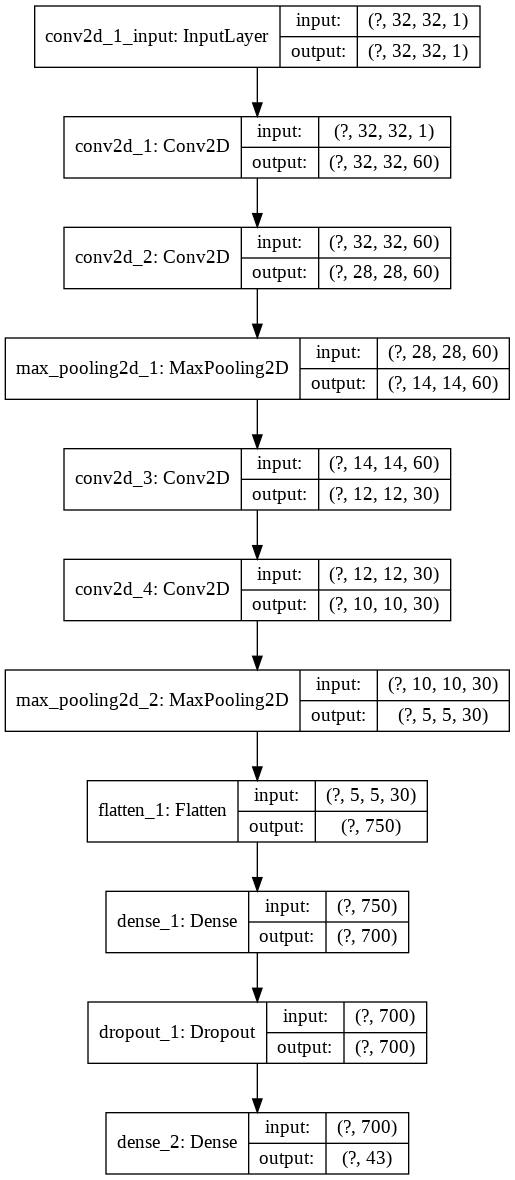

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)